## K-최근접 이웃( K-Nearest Neighbor) 알고리즘

#### K-최근접 이웃 알고리즘  
- K-Nearest Neighbor : K-NN
- 데이터를 가장 가까운 속성에 따라 분류하여 레이블링 하는 알고리즘
- K개의 가까운 이웃의 속성에 따라 분류 
    - 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단
- 유클리안 거리 사용 
---
### 사이킷런의 KNN 알고리즘 클래스
- 분류 모델을 위한 KNeighborsClassifier
- 회귀 모델을 위한 KNeighborsRegressor
- 매개변수 동일 
---
- KNeighborsClassifier 주요 매개변수
  - n_neighobrs : 디폴트 5
  - weights 
    - uniform : 각 이웃의 포인트에 동일한 가중치 부여 (디폴트)  
    - distance : 거리의 역수로 가중치 부여. 
      - 가까운 데이터가 멀리 있는 데이터보다 큰 영향을 미침 
---
그림에서    
- 소속 그룹 판단
    - K=1인 경우 : 노란색 그룹
    - K=3인 경우 : 파란색 그룹

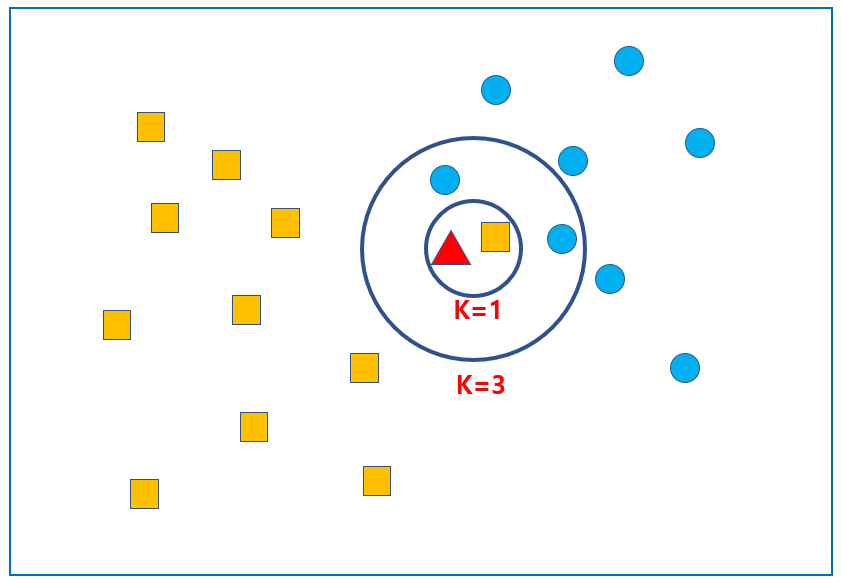

### K-최근접 이웃 알고리즘 예제

### K-최근접 이웃 알고리즘 예측 프로세스
- (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터   
    - 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)    
    - 피처 데이터 / 레이블 데이터 생성     
- (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트    
- (3) 모델 학습 / 평가 / 예측     
    - 결과 : 잘못 예측    
- (4) 길이/무게 두 변수 스케일링    
- (5) 스케일된 값으로 모델 학습 / 평가 / 예측   

### (1) 데이터 세트 준비 : 도미와 빙어 길이와 무게 데이터  
- 길이와 무게 각 49 데이터 : 도미(35) / 빙어(14)  
- 피처 데이터 / 레이블 데이터 생성 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 도미와 빙어 데이터 준비 (길이와 무게)
# 큰 수치 35개 : 도미
# 작은 수치 14개 : 빙어

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,  31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,  500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,  700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

###  데이터 합치기
- np.concatenate() : 1차원 배열로 합치기 (옆으로)
- np.column_stack() : 2차원 배열로 합치기


In [7]:
# 피처 데이터 생성
# 데이터 합치기 : [길이, 무게] 2차원 형태
fish_data = np.column_stack((fish_length, fish_weight))
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [8]:
# 레이블 데이터 : target 값
# 49개의 값 중 앞 35는 도미(1), 뒤의 14개는 방어(0)로 구분
# np.ones(개수) : 개수만큼 1 생성
# np.zeros(개수) : 개수만큼 0 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 피처 데이터와 레이블 데이터 준비 완료
# fish_data, fish_target

### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_data,
                                                fish_target,
                                                stratify = fish_target,
                                                random_state=42)

# stratify=y값 (레이블 데이터)
# 레이블 값에서 원본과 0과 1의 비율을 유지하면서 데이터 세트 분리하는 옵션
# test_size=0.2 (0.3) 지정 안 했음 (자동으로 약 26.5%로 지정되었음)
# 13 / 49

In [10]:
13/49

0.2653061224489796

In [11]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(36, 2)

(13, 2)

(36,)

(13,)

In [18]:
# stratify = fish_target 옵션 설정한 경우
# 전체 49개 중에서 0과 1의 비율 확인
# fish_target
pd.Series(fish_target).value_counts()
pd.Series(fish_target).value_counts(normalize=True)

# y_train
pd.Series(y_train).value_counts()
pd.Series(y_train).value_counts(normalize=True)

# y_test
pd.Series(y_test).value_counts()
pd.Series(y_test).value_counts(normalize=True)

1.0    35
0.0    14
Name: count, dtype: int64

1.0    0.714286
0.0    0.285714
Name: proportion, dtype: float64

1.0    26
0.0    10
Name: count, dtype: int64

1.0    0.722222
0.0    0.277778
Name: proportion, dtype: float64

1.0    9
0.0    4
Name: count, dtype: int64

1.0    0.692308
0.0    0.307692
Name: proportion, dtype: float64

In [ ]:
# #  stratify =fish_target 옵션 설정 안 했을 경우 

# X_train, X_test, y_train, y_test = train_test_split(fish_data,
#                                                     fish_target,
#                                                     random_state=42)

# # fish_target
# pd.Series(fish_target).value_counts()
# pd.Series(fish_target).value_counts(normalize=True)

# # y_train
# pd.Series(y_train).value_counts()
# pd.Series(y_train).value_counts(normalize=True)

# # y_test
# pd.Series(y_test).value_counts()
# pd.Series(y_test).value_counts(normalize=True)

# 차이가 더 큼 (옵션 키는 것 권장)

### (3) 모델 학습 / 평가 / 예측 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier() # n_neighbors=5 기본값
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# 임의의 테스트 데이터로 예측
# 훈련된 모델에 길이가 25, 무게가 15인 생선으로 테스트 수행
kn_clf.predict([[25, 150]])

# 예측 결과
# 0 (빙어)로 예측 ---> 잘못된 예측

# [25, 150] : 오류
# Expected 2D array, got ID array instead:

array([0.])

#### 빙어로 예측한 이유 확인 : 산점도 확인
- 누구를 이웃으로 판단하는지 확인 필요 

Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

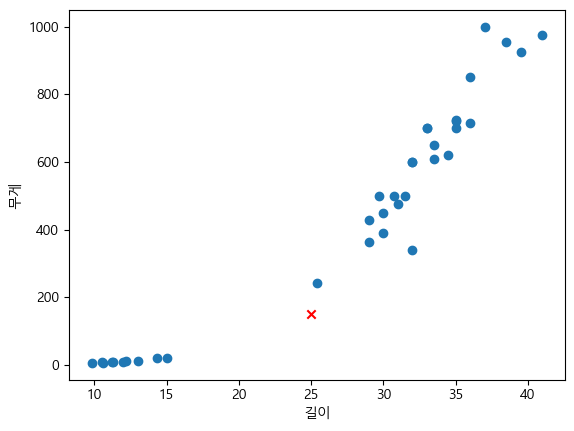

In [25]:
# 산점도 그래프 확인
# x축 : 길이
# y축 : 무게
# plt.scatter(fish_length, fish_weight)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(25, 150, color='red', marker='x')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

# 그래프 확인 결과
# [25, 150] 위치 표시 : 우측의 도미와 더 가까이 위치해 있음
# 그런데 빙어라고 예측
# 이웃이라고 생각하는 지점 확인 필요
# ---> 이웃 표시

In [26]:
# 가장 가까운 이웃 찾아서 확인
# kneighbors() 사용 : 거리, 인덱스
# 이웃까지의 거리와 이웃 샘플의 인덱스 값 반환
# 기본 값이 5 : 5개의 이웃에 거리와 인덱스 반환

dist, idx = kn_clf.kneighbors([[25, 150]])

In [27]:
dist
idx

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

array([[21, 33, 19, 30,  1]], dtype=int64)

In [28]:
X_train[idx]
# 이웃이라고 생각하는 5개 샘플 확인
# 4개가 빙어 수치
# 그래서 빙어로 예측했구나 확인

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

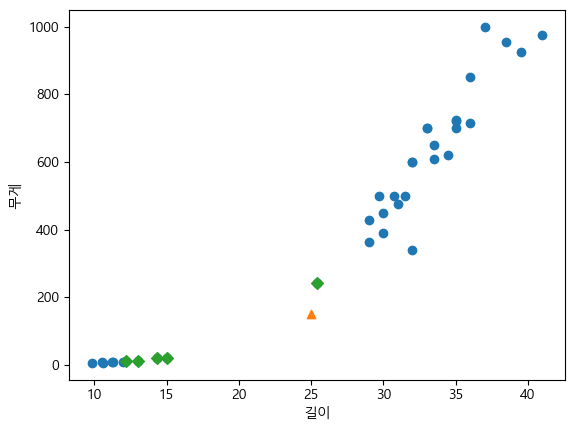

In [32]:
# 그래프에 5개 이웃 표시 
plt.scatter(X_train[:,0] , X_train[:,1])
plt.scatter(25, 150, marker='^')

# idx에 해당되는 길이와 무게 표시
plt.scatter(X_train[idx, 0], X_train[idx, 1], marker='D') # 다이아몬드 형태

plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

# 그래프 및 idx 값 확인 결과
# 최근접 이웃 5개 중에서 4개가 빙어이고, 1개만 도미

In [33]:
# 첫 번째 이웃과 두 번째 이웃과의 거리 확인
from scipy.spatial import distance
distance.euclidean((25.4, 242), (25, 150))
distance.euclidean((15, 19.9), (25, 150))

92.00086956110795

130.4837537780087

#### 결과가 잘못 나온 이유  
- 길이와 무게가 1대1로 모델에 반영되려면 크기가 비슷해야 하는데,   
- 길이에 비해 무게가 크기가 너무 커서 길이와 무게가 다른 비율로 반영됨  
- 거리 92와 130 비율이 이상함  
- x축은 범위가 좁고, y축은 범위가 넓기 때문에, 실제 거리가 크게 증가함  
- 즉, 두 변수의 값이 스케일이 다르다고 할 수 있음  
- 스케일링 필요 : 표준 스케일링 적용 

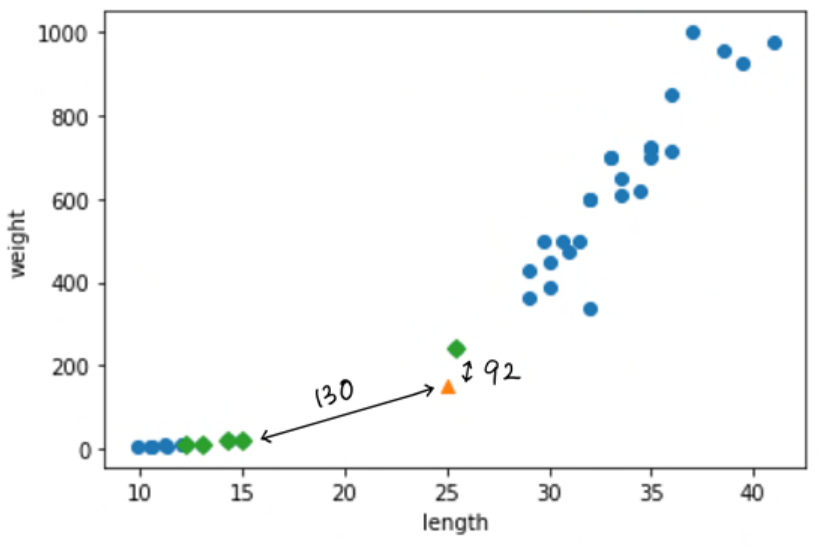

### (4) 길이/무게 두 변수 스케일링

#### z-점수 표준화(z-score standardization)   
    - 데이터의 평균을 0, 분산을 1이 되도록 스케일링하는 것  
    - 표준 스케일링과 동일 : StandardScaler와 결과 동일  
    - 각 값이 평균에서 얼마나 떨어져 있는지를 나타내는 척도    
    - 이상치 문제를 피하는 데이터 정규화 벙법으로 사용     
    - (원점수 - 평균) / 표준편차    

In [35]:
# 표준 스케일링 확인
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[:10]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721]])

In [36]:
# 평균 구하기 
mean = np.mean(X_train, axis=0)
mean

# 표준편차
std = np.std(X_train, axis=0)
std

array([ 27.29722222, 454.09722222])

array([  9.98244253, 323.29893931])

In [38]:
# X_train 스케일링 : (원점수 - 평균) / 표준편차 
X_train_scaled = (X_train - mean) / std
X_train_scaled[:10]

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721]])

### (5) 스케일된 값으로 모델 학습 / 평가 / 예측

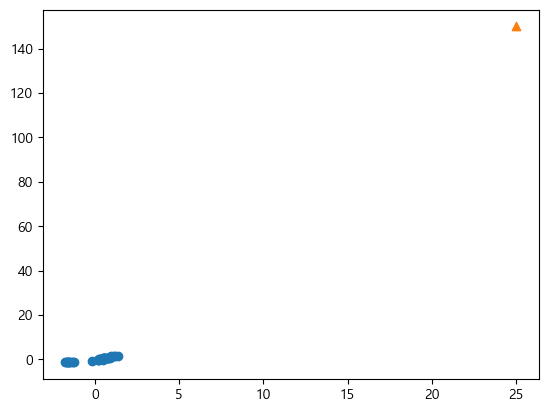

In [39]:
# X_train_scaled와 [25, 150] 위치 확인
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
plt.scatter(25, 150, marker='^') # 이 수치가 문제 : 스케일링 안 된 데이터로 테스트
# 그래프 출력 결과
# x축, y축 범위가 25, 150에 맞춰 확장되었음
# 이유 : 스케일링 안 된 수치로 테스트 했기 때문
# 테스트 데이터 (25, 150)도 스케일링 해야 함

#### 테스트 데이터도 스케일링

In [41]:
# 테스트 데이터도 스케일링 한 후
# 그래프로 표시
# (원점수 - 평균) / 표준편차

test_scaled = ([25, 150] - mean) / std
test_scaled

array([-0.23012627, -0.94060693])

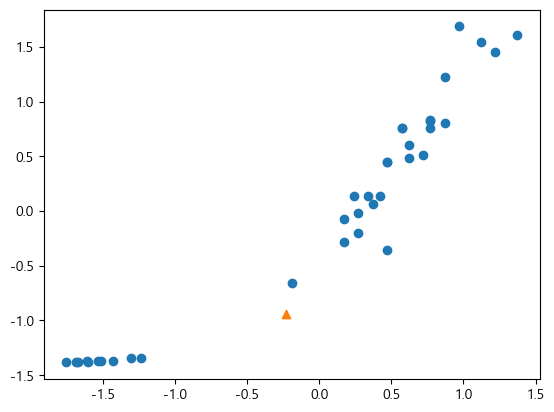

In [42]:
# 모든 스케일링된 데이터로 그래프 출력
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
plt.scatter(test_scaled[0], test_scaled[1], marker='^')

In [43]:
# 재학습 : 스케일링된 학습 데이터로 재학습
kn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
# (25, 150) 스케일링된 수치로 예측 수행
kn_clf.predict([test_scaled])
# 1 (도미)로 예측 --> 정확

array([1.])

In [45]:
# X_test 데이터 스케일링 
X_test_scaled = (X_test - mean) / std
X_test_scaled[:10]

In [46]:
y_pred = kn_clf.predict(X_test_scaled)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
# 예측 확률
kn_clf.predict_proba(X_test_scaled)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [48]:
# 평가 수행  : 다양한 성능평가지표로 확인
# 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC_AUC 스코어 

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def get_clf_eval(y_test, y_pred, pred_proba) :
    cm = confusion_matrix(y_test, y_pred) # 혼동행렬(오차행렬)
    accuracy = accuracy_score(y_test, y_pred) # 정확도
    precision = precision_score(y_test, y_pred) # 정밀도
    recall = recall_score(y_test, y_pred)# 재현율
    f1 = f1_score(y_test, y_pred) # F1 스코어
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC_AUC 스코어
    
    # 출력 
    # 오차행렬
    print("오차행렬 : ", cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f},  재현율: {recall:.4f}, F1 Score: {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

In [50]:
# 레이블 값이 1일 때의 예측 확률
pred_proba = kn_clf.predict_proba(X_test_scaled)[:, 1]

# 예측 모델 평가 수행 및 평가지표 출력하는 함수 호출
get_clf_eval(y_test, y_pred, pred_proba)

오차행렬 :  [[4 0]
 [0 9]]
정확도: 1.0000, 정밀도: 1.0000,  재현율: 1.0000, F1 Score: 1.0000, ROC_AUC : 1.0000


Text(0.5, 0, '길이')

Text(0, 0.5, '무게')

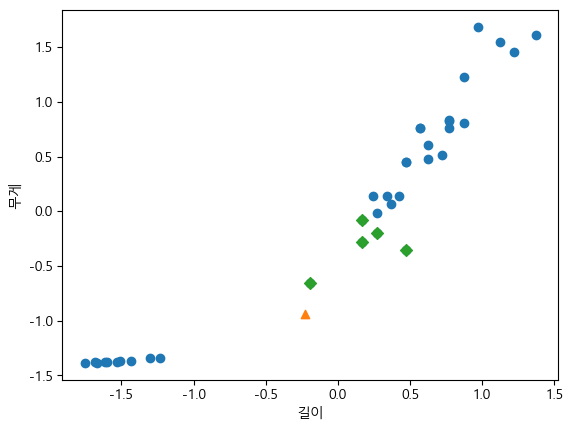

In [51]:
# 최종 그래프로 확인
# 가까운 이웃 데이터 5개 다 제대로 표시된 그래프 
dist, idx = kn_clf.kneighbors([test_scaled]) # 5개 이웃의 index 추출

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.scatter(test_scaled[0], test_scaled[1], marker='^')
plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx,1], marker='D') # 5개 이웃의 위치 표시 
plt.xlabel('길이')
plt.ylabel('무게')

plt.show()


# 그래프 출력 결과
# 가까운 데이터 5개에 도미가 다  들어옴
# 도미로 정확하게 예측 